In [29]:
import pandas as pd
import numpy as np
import pickle
import os
from parse_gpt_output import *
import matplotlib.pyplot as plt

In [2]:
file = './history_gpt_api/history_2023-08-21 12-55-58'
# check if file exists
if os.path.isfile(file):
    #open with pickle
    with open(file, 'rb') as f:
        history = pickle.load(f)

In [24]:
usage = []

sample = None

for call in history:
    chat = call["chat"]
    ids = call["ids"]
    use = call['chat'].usage
    finish_reason = call['chat'].choices[0].finish_reason
    usage.append(use)
    if not call["query_ok"]:
        if finish_reason != 'stop':
            sample = call
        print(finish_reason, use['total_tokens'])
    # break

usage = np.array(usage)

stop 3081
length 4097
length 4097
stop 3225
stop 3320


In [7]:
def get_data_answer_gpt(ans, ids):
    columns = ['id', 'n_banos', 'n_plazas_garaje', 'direccion', 'landmarks_cercanos', 'piscina', 'info_alquiler', 'calefaccion', 'valoracion']
    int_columns = ['id', 'n_banos', 'n_plazas_garaje', 'valoracion']
    str_columns = ['direccion', 'landmarks_cercanos', 'piscina', 'info_alquiler', 'calefaccion']
    data = []
    error_id = []
    for item in ans.split('(')[1:]:
        item = item.strip().replace(')', '')
        row = item.split(';')
        # check if the row has the correct number of columns
        if len(row) == len(columns) and row[0] in [str(id) for id in ids]:
            data.append(row)
        else:
            error_id.append(row[0])
    data = pd.DataFrame(data, columns=columns)
    data = data.replace('E', -1)
    data = data.fillna(-1)
    data[int_columns] = data[int_columns].astype(int)
    data[str_columns] = data[str_columns].astype(str)
    return data, error_id

In [12]:
ans = get_answer_gpt(sample['chat'])
for item in ans.split('(')[1:]:
    item = item.strip().replace(')', '')
    row = item.split(';')
    print(len(row), row)

8 ['34828055', 'E', '2', 'avenida Fonteculler, Portádego - Vilaboa Norte, Culleredo', 'Burgo, universidad Laboral, supermercados, colegios, farmacias, áreas verdes', ',No,E,fianza', 'E', '7']
9 ['101497794', 'E', 'E', 'calle Julio Rodríguez Yordi, 8, Riazor - Los Rosales, a Coruña', 'Playa de Riazor, Estadio', ',E,E', 'LUCÍA NOGUEIRA alquila POR TEMPORADA este céntrico y luminoso piso amueblado a sólo 750m. de la Playa de Riazor y a dos pasos del Estadio. Son 70m2 distribuidos en salón, 3 dormitorios, baño, cocina equipada y terraza. Inmueble sin barreras arquitectónicas, con ascensor y muy buen estado de conserva', ',E', '6']
10 ['1268832', 'E', 'E', 'calle Alcalde Jaime Hervada, Agra del Orzán - Ventorrillo, a Coruña', 'centro cívico del Ágora, supermercados, colegios, piscina pública', ',E', 'E', 'Situado en el Ventorrillo en frente de centro cívico del Ágora, una zona con vistas despejadas y zonas verdes. Un barrio con todos los servicios de supermercados, colegios, piscina pública

In [19]:
display(get_data_answer_gpt(ans, sample['ids'])[0])
display(get_data_answer_gpt(ans, sample['ids'])[1])

,id,n_banos,n_plazas_garaje,direccion,landmarks_cercanos,piscina,info_alquiler,calefaccion,valoracion
0,101497794,-1,-1,"calle Julio Rodríguez Yordi, 8, Riazor - Los R...","Playa de Riazor, Estadio",",E,E",LUCÍA NOGUEIRA alquila POR TEMPORADA este cént...,",E",6


['34828055',
 '1268832',
 '98189795',
 '101396515',
 '102254807',
 '101062386',
 'el principal con baño incorporado y amplio vestidor 2 baños completos',
 'ducha de hidromasaje, cocina independiente, amplia, totalmente equipada, suelo en tarima, calefacción p',
 '102037998',
 'CURSO ESCOLAR Situado en la avenida Finisterre, entre la Ronda de Nelle y la Ronda de Outeiro. Una zona con todos los servicios de colegios, institutos, supermercados, farmacia, etc. , con una situación estratégica a 15 minutos del centro de la ciudad. La vi',
 '102185252',
 'zona Los Castros, próximo a los Hospitales CHUAC, San Rafael, Materno Infantil, etc.. . y a la Playa de Oza, con buenas comunicaciones de entrada y salida a la ciudad. Dispone de una superficie útil de 73 M2 distribuidos en salón, cocina, dos habita',
 '99128048',
 '100496959']

### Análisis de uso

In [41]:
df_usage = []

for use in usage:
    row = [use["prompt_tokens"], use["completion_tokens"], use["total_tokens"]]
    print(row)
    df_usage.append(row)

df_usage = pd.DataFrame(df_usage, columns=["prompt", "output", "total"]).sort_values(by="total", ascending=True)

[2655, 776, 3431]
[2550, 967, 3517]
[2568, 855, 3423]
[2676, 917, 3593]
[2545, 630, 3175]
[2479, 602, 3081]
[2601, 715, 3316]
[2606, 734, 3340]
[2479, 803, 3282]
[2657, 740, 3397]
[2501, 656, 3157]
[2278, 606, 2884]
[2493, 626, 3119]
[2298, 783, 3081]
[2275, 551, 2826]
[2257, 577, 2834]
[2314, 584, 2898]
[2035, 605, 2640]
[2077, 690, 2767]
[2648, 580, 3228]
[2719, 705, 3424]
[2670, 652, 3322]
[2733, 1111, 3844]
[2694, 1066, 3760]
[2639, 1458, 4097]
[2677, 627, 3304]
[2636, 750, 3386]
[2618, 784, 3402]
[2696, 1401, 4097]
[2604, 621, 3225]
[2662, 658, 3320]
[2629, 1180, 3809]
[2586, 603, 3189]
[2557, 793, 3350]


In [ ]:
x = 

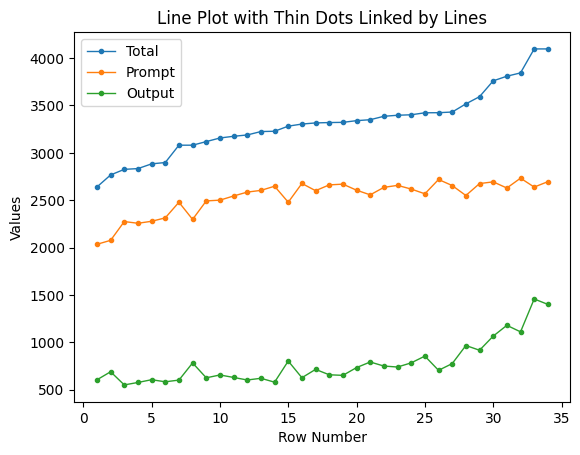

In [50]:
import matplotlib.pyplot as plt

# Generate x-axis values (numbers from 1 to the number of rows in df)
x_values = range(1, len(df_usage) + 1)

# Create a line plot with thinner dots linked by lines
plt.plot(x_values, df_usage['total'], 'o-', label='Total', linewidth=1, markersize=3)
plt.plot(x_values, df_usage['prompt'], 'o-', label='Prompt', linewidth=1, markersize=3)
plt.plot(x_values, df_usage['output'], 'o-', label='Output', linewidth=1, markersize=3)

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('Values')
plt.title('Line Plot with Thin Dots Linked by Lines')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [128]:
np.append(x, np.array(5))

array([2035, 2077, 2275, 2257, 2278, 2314, 2479, 2298, 2493, 2501, 2545,
       2586, 2604, 2648, 2479, 2677, 2601, 2662, 2670, 2606, 2557, 2636,
       2657, 2618, 2568, 2719, 2655, 2550, 2676, 2694, 2629, 2733, 2639,
       2696,    5], dtype=int64)

In [123]:
x

array([[2035],
       [2077],
       [2275],
       [2257],
       [2278],
       [2314],
       [2479],
       [2298],
       [2493],
       [2501],
       [2545],
       [2586],
       [2604],
       [2648],
       [2479],
       [2677],
       [2601],
       [2662],
       [2670],
       [2606],
       [2557],
       [2636],
       [2657],
       [2618],
       [2568],
       [2719],
       [2655],
       [2550],
       [2676],
       [2694],
       [2629],
       [2733],
       [2639],
       [2696]], dtype=int64)

In [58]:
x = df_usage["prompt"].values.reshape(-1, 1)
y = df_usage["total"].values.reshape(-1, 1)

R-squared: 0.6390832585436101


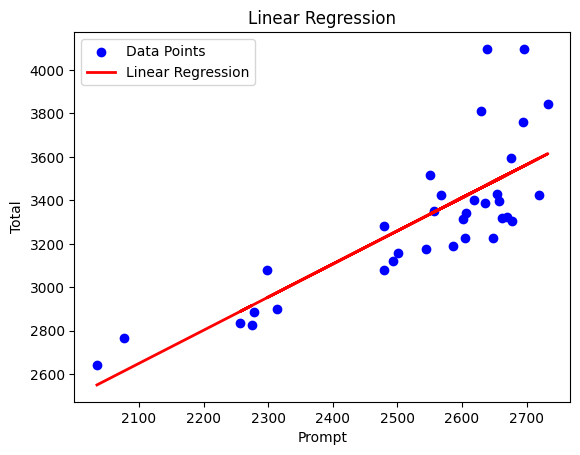

In [63]:
# make linear reg y~x
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x, y)
r2_score = model.score(x, y)
print("R-squared:", r2_score)

y_pred = model.predict(x)

# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Prompt')
plt.ylabel('Total')
plt.title('Linear Regression')
plt.legend()
plt.show()


R-squared (Polynomial Regression): 0.6615558368387457


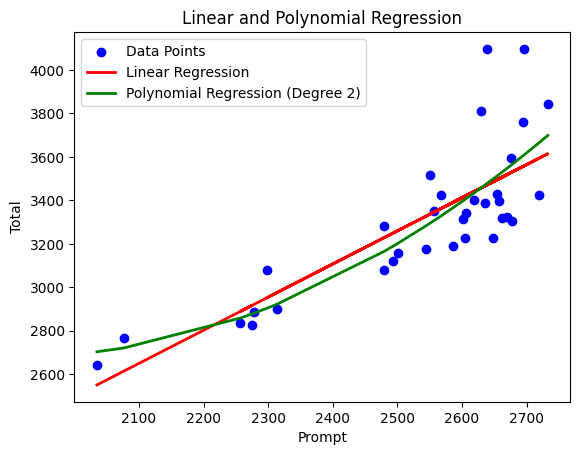

In [69]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  # You can adjust this degree
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)

# Fit a linear regression model using polynomial features
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# Predict using the polynomial model
y_poly_pred = poly_model.predict(x_poly)

# Calculate R-squared score for the polynomial model
r2_poly_score = poly_model.score(x_poly, y)

print("R-squared (Polynomial Regression):", r2_poly_score)

# Scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')

# Plot the polynomial regression curve
x_sorted = np.sort(x, axis=0)
y_poly_pred_sorted = poly_model.predict(poly.fit_transform(x_sorted))
plt.plot(x_sorted, y_poly_pred_sorted, color='green', linewidth=2, label='Polynomial Regression (Degree {})'.format(degree))

plt.xlabel('Prompt')
plt.ylabel('Total')
plt.title('Linear and Polynomial Regression')
plt.legend()
plt.show()

#export model


In [74]:
xx = x[0:5]
xx 
np.append(xx, [5])

array([2035, 2077, 2275, 2257, 2278,    5], dtype=int64)

In [80]:
model.predict(np.array(5).reshape(1,1))

array([[-544.59897442]])

In [129]:
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

class ModelTokensPredictor:
    def __init__(self, x, y, degree=2, filename='model_tokens_predictor'):
        self.poly_model = LinearRegression()
        self.poly = PolynomialFeatures(degree=degree)
        self.x = x
        self.y = y
        self.degree = degree
        self.filename = filename
        self.is_trained = False
        self.model = self
    
    def train(self):
        x_poly = self.poly.fit_transform(self.x)
        self.poly_model.fit(x_poly, self.y)
        self.export_model()
        self.is_trained = True
    
    def export_model(self):
        joblib.dump(self, self.filename)
    
    def add_new_data(self, x, y):
        self.x = np.append(self.x, np.array(x)).reshape(-1, 1)
        self.y = np.append(self.y, np.array(y)).reshape(-1, 1)
    
    def predict(self, x):
        x = np.array(x).reshape(-1, 1)
        x = self.poly.transform(x.reshape(-1, 1))
        predictions = self.poly_model.predict(x)
        return predictions[0][0]
    
    def plot_data_and_predictions(self):
        x_range = np.linspace(min(self.x), max(self.x), 100)
        x_range_poly = self.poly.transform(x_range.reshape(-1, 1))
        y_range_pred = self.poly_model.predict(x_range_poly)
        
        plt.scatter(self.x, self.y, color='blue', label='Data Points')
        plt.plot(x_range, y_range_pred, color='green', linewidth=2, label='Polynomial Regression')
        
        plt.xlabel('Prompt')
        plt.ylabel('Total')
        plt.title('Data and Polynomial Regression')
        plt.legend()
        plt.show()

In [130]:
model = ModelTokensPredictor(x, y, degree=2, filename='model_tokens_predictor')
model.train()

In [132]:
model.add_new_data(2150, 2800)

In [133]:
model.train()

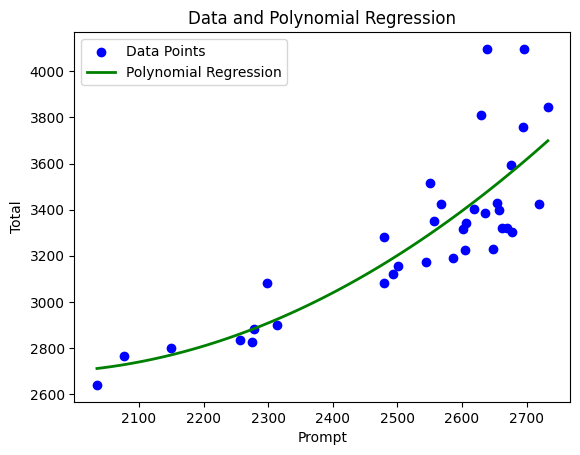

In [134]:
model.plot_data_and_predictions()